Formulas for surface area of crust side, crust base, and volume of pie as a function of the radius of the crust base $r$ and the height of the sides of the pie $h$:

$A_{side} = 2 \pi r h$

$A_{base} = \pi r^2$

$V = \pi r^2 h$

Let's arbitrarily set the total area of the crust as 1 (square foot):

$A_{base} + A_{side} = 1$

We can now solve for the value of $r$ as a function of $h$:

$\pi r^2 + 2 \pi h r - 1 = 0$

$r = \frac{-2 \pi h + \sqrt{4 \pi^2 h^2 + 4 \pi}}{2 \pi}$

(We use the positive root in the quadratic equation, as it's the only one that yields a positive radius.) We could at this point do a bunch of painful calculus to find the value of $h$ that maximizes $V$, but why do that when we can just solve numerically?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import optimize

In [2]:
def r(h):
    h2 = h*h
    return (-2 * math.pi * h + np.sqrt(4 * math.pi**2 * h2 + 4 * math.pi)) / (2 * math.pi)

def Abase(h):
    rh = r(h)
    return math.pi * rh * rh
    
def Aside(h):
    return 2 * math.pi * r(h) * h
    
def V(h):
    rh = r(h)
    return math.pi * rh * rh * h

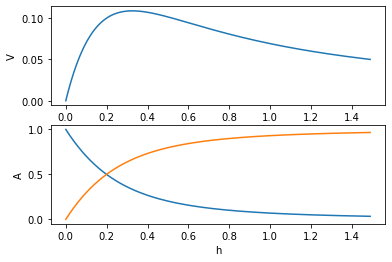

In [3]:
h = np.arange(0, 1.5, 0.01)

fig, axs = plt.subplots(2)
axs[0].set_ylabel("V")
axs[0].plot(h, V(h), label="V")
axs[1].plot(h, Abase(h), label="A_{base}")
axs[1].plot(h, Aside(h), label="A_{side}")
axs[1].set_ylabel("A")
axs[1].set_xlabel("h")

plt.show()

In [4]:
hmax = optimize.fmin(lambda h: -V(h), 0.3)[0]

Optimization terminated successfully.
         Current function value: -0.108578
         Iterations: 10
         Function evaluations: 20


In [5]:
rmax = r(hmax)
Ab_max = Abase(hmax)
As_max = Aside(hmax)
Vmax = V(hmax)
print("At max volume:")
print("  h     = {0:.4f} ft   = {1:.4f} in".format(hmax, hmax * 12))
print("  r     = {0:.4f} ft   = {1:.4f} in".format(rmax, rmax * 12))
print("  Abase = {0:.4f} ft^2 = {1:.4f} in^2".format(Ab_max, Ab_max * 144))
print("  Aside = {0:.4f} ft^2 = {1:.4f} in^2".format(As_max, As_max * 144))
print("  V     = {0:.4f} ft^3 = {1:.4f} in^3".format(Vmax, Vmax * 144 * 12))

At max volume:
  h     = 0.3257 ft   = 3.9087 in
  r     = 0.3257 ft   = 3.9089 in
  Abase = 0.3333 ft^2 = 48.0018 in^2
  Aside = 0.6667 ft^2 = 95.9982 in^2
  V     = 0.1086 ft^3 = 187.6234 in^3


In [6]:
Abase(hmax)

0.3333459734423325

What if we write $h$ in terms of $r$?

$\pi r^2 + 2 \pi h r = 1$

$2 \pi h r = 1 - \pi r^2$

$h = \frac{1 - \pi r^2}{2 \pi r}$

$h = \frac{1}{2 \pi r} - \frac{r}{2}$

Substituting into the expression for $V$:

$V = 2 \pi r^2 h$

$V = 2 \pi r^2 (\frac{1}{2 \pi r} - \frac{r}{2})$

$V = r - \pi r^3$

We can find the value of $r$ that maximizes $V$ by taking the derivative and setting to 0:

$\frac{d V}{d r} = 1 - 3 \pi r_{max}^2 = 0$

$3 \pi r_{max}^2 = 1$

$r_{max} = \sqrt{\frac{1}{3 \pi}}$

This allows us to calculate the solution numerically:

$A_{base}(r_{max}) = \pi (\sqrt{\frac{1}{3 \pi}})^2 = \frac{1}{3}$

In [7]:
np.arange(0, 10, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [ ]:
np.arange